In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = '#000033'

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.isnull().values.any()

True

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [6]:
df['Type'].fillna("Free", inplace = True) #Since most apps are free


In [7]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [8]:
df['Content Rating'].fillna("Everyone", inplace = True) #Most likely

In [9]:
df['Rating'].fillna(value=df['Rating'].median(), inplace = True) #Since many missing values, safer bet to replace with median 

In [10]:
df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True) #Redundant

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [12]:
df.describe()

,Rating
count,10841.000000
mean,4.207841
std,0.500893
min,1.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [14]:
df['Size'] = df.Reviews.astype(object)


In [15]:
#Removing unwanted symbols
df['Size'] = df.Size.apply(lambda x: x.strip('+'))
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))
df['Size'] = df.Size.apply(lambda x: x.replace(',', ''))
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))
df['Price'] = df.Price.apply(lambda x: x.strip('$'))
df['Size'] = df.Size.replace('Varies with device', np.NaN)

df['Size'] = pd.to_numeric(df['Size']) 
#df['Installs'] = pd.to_numeric(df['Installs'])
#df['Price'] = pd.to_numeric(df['Price'])

df.dropna(subset = ['Size'], inplace=True)

In [16]:
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Free             1
Name: Installs, dtype: int64

In [17]:
df['Installs'].replace(to_replace = ['Free'], value =[0], inplace=True)

In [18]:
df['Price'].value_counts()

0         10040
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
4.85          1
3.88          1
3.28          1
394.99        1
4.59          1
Name: Price, Length: 93, dtype: int64

In [20]:
df['Installs'] = pd.to_numeric(df['Installs'])


In [21]:
df['Price'].replace(to_replace = ['Everyone'], value =[0], inplace=True)
df['Price'] = pd.to_numeric(df['Price'])

In [31]:
x = df['Content Rating'].value_counts().index
y = df['Content Rating'].value_counts()

xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

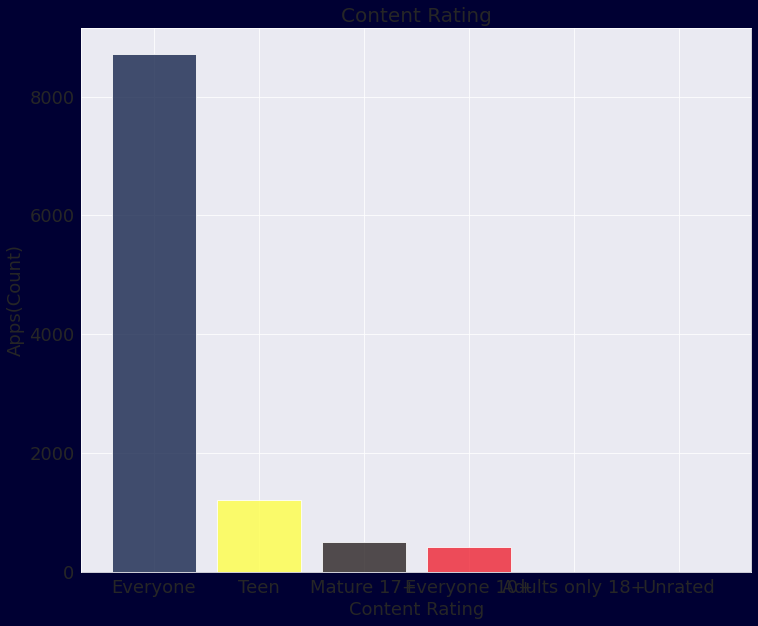

In [34]:
plt.figure(figsize=(12,10))
plt.bar(xsis,ysis,width=0.8,color=['#15244C','#FFFF48','#292222','#EF2333','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

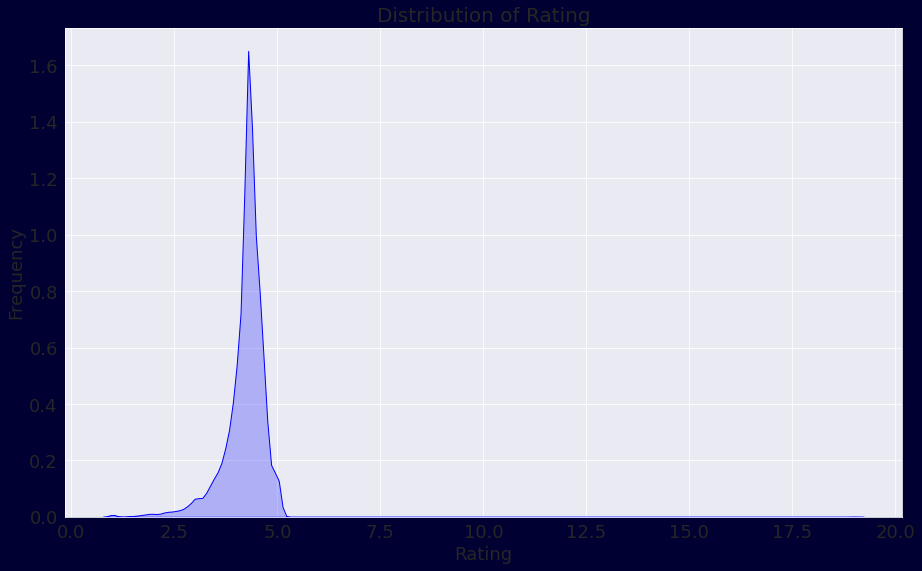

In [35]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

ValueError: ignored

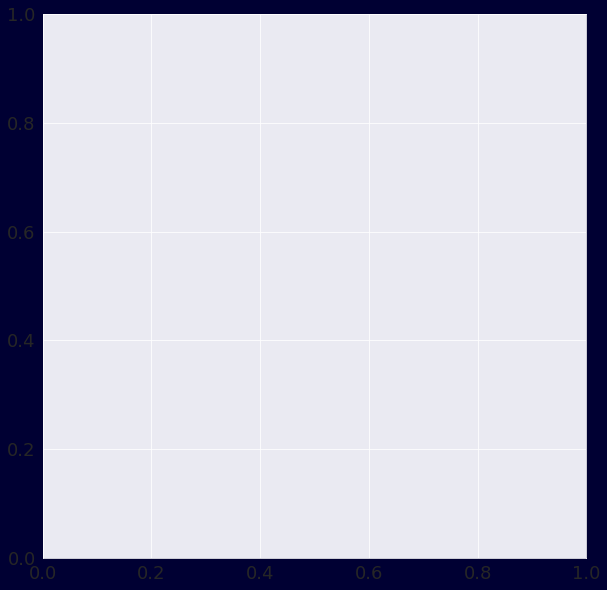

In [28]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()